#Importar mi Matriz de confusion

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!cp /content/drive/MyDrive/Modulos/matriz_confusion.py /content

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


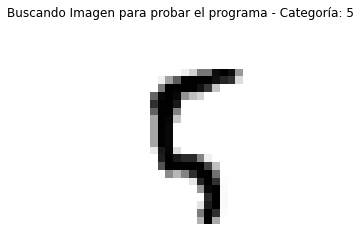

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
469/469 [==============================] - 25s 52ms/step - loss: 0.4072 - accuracy: 0.8676 - val_loss: 0.1583 - val_accuracy: 0.9513
Epoch 2/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0977 - accuracy: 0.9689 - val_loss: 0.0805 - val_accuracy: 0.9751
Epoch 3/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0704 - accuracy: 0.9769 - val_loss: 0.0679 - val_accuracy: 0.9773
Epoch 4/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0556 - accuracy: 0.9822 - val_loss: 0.0645 - val_accuracy: 0.9768
Epoch 5/10
469/469 [==============================] - 24s 50ms/step - loss: 0.0470 - accuracy: 0.9849 - val_loss: 0.0491 - val_accuracy: 0.9839
Epoch 6/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0445 - val_accuracy: 0.9864
Epoch 7/10
469/469 [==============================] - 24s 50ms/step - loss: 0.0355 - accuracy: 0.9885 - val_loss: 0.0385 - val_accuracy:

AttributeError: ignored

In [7]:
#Daniel Alberto Zapata Jimenez
#Red Neuronal

import numpy as np
np.random.seed(2)

import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from tensorflow.keras.optimizers import SGD

(x_train, y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train = x_train/255.0
x_test = x_test/255.0

nclases = 10
y_train = np_utils.to_categorical(y_train,nclases)
y_test = np_utils.to_categorical(y_test,nclases)

nimagen = 100
plt.imshow(x_train[nimagen,:].reshape(28,28), cmap='gray_r')
plt.title('Buscando Imagen para probar el programa - Categoría: ' + str(np.argmax(y_train[nimagen])))
plt.axis('off')
plt.show()

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

#Creación del modelo Keras
modelo = Sequential()
# CONV1 Y MAX-POOLING1
modelo.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
modelo.add(MaxPooling2D(pool_size=(2,2)))
# CONV2 Y MAX-POOLING2
modelo.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
# Aplanar, FC1, FC2 y salida
modelo.add(Flatten())
modelo.add(Dense(120,activation='relu'))
modelo.add(Dense(84,activation='relu'))
modelo.add(Dense(nclases,activation='softmax'))
sgd = SGD(lr=0.1)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#Entrenamiento y validación del modelo
nepochs = 10
tam_lote = 128
modelo.fit(x_train,y_train,epochs=nepochs,batch_size=tam_lote, verbose=1, validation_data=(x_test,y_test))
#Análisis
from matriz_confusion import graficar_matriz_de_confusion
y_pred = modelo.predict_classes(x_test)
y_ref = np.argmax(y_test,axis=1)
etiquetas = ['0','1','2','3','4','5','6','7','8','9']
graficar_matriz_de_confusion(y_ref, y_pred, etiquetas)

#Random Forest

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Fetching MNIST Dataset
mnist = fetch_openml('mnist_784', version=1)

# Get the data and target
X, y = mnist["data"], mnist["target"]

# Split the train and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training on the existing dataset
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Evaluating the model
y_pred = rf_clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy score after training on existing dataset", score)

#Support Vector Machine

In [ ]:
from scipy.stats import mode
import numpy as np
#from mnist import MNIST
from time import time
import pandas as pd
import os
import matplotlib.pyplot as matplot
import matplotlib
%matplotlib inline

import random
matplot.rcdefaults()
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.filterwarnings('ignore')

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/')

train = mnist.train.images
validation = mnist.validation.images
test = mnist.test.images

trlab = mnist.train.labels
vallab = mnist.validation.labels
tslab = mnist.test.labels

train = np.concatenate((train, validation), axis=0)
trlab = np.concatenate((trlab, vallab), axis=0)

svm = LinearSVC(dual=False)
svm.fit(train, trlab)

svm.coef_
svm.intercept_
pred = svm.predict(test)

accuracy_score(tslab, pred) # Accuracy


cm = confusion_matrix(tslab, pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()


